#Exploratory Data Analysis (EDA) and Machine Learning algorithms comaparision on Titanic dataset

---
##**Abstract:**

For this assignment, we will

1. Do an Exploratory Data Analysis of the given data to see if we can make some inferences before create machine learning models

2. Train and compare some of the most popular ML models, SVM, KNN, Logistic Regression, Random Forest, Naive Bayes, SGD, Decision Tree


##**Data Source:**

The analysis is carried out using a [publically available data from the Titanic shipwreck](https://www.kaggle.com/c/titanic/data). The dataset(split into 2 datasets: train and test) train holds 891 records with 12 attributes such as PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare and Cabin. Test dataset holds 418 records with 11 columns.

###**Data Dictionary:**
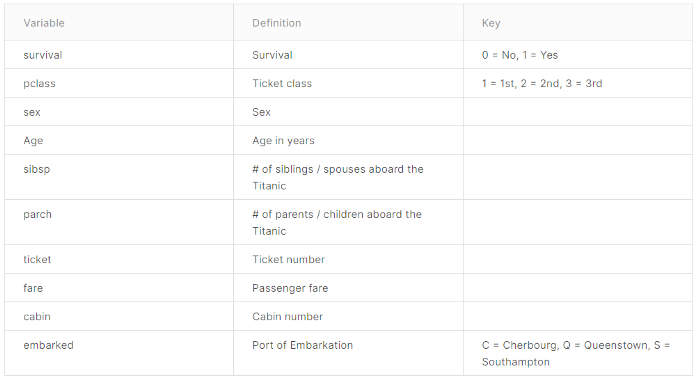

### Installation and setup
For this assignment, we are using the following libraries:

1. Pandas and Numpy for mathematic operations on our dataset 
2. seaborn and matplotlib
3. sklearn for predictions
4. Jupyter notebooks

We reccomend you check the installation docs for these respective libs

You will further need to get the data source from yourself, and extract the train.csv and test.csv files in the same folder as this Jupyter Notebook, because we are using relative paths for importing data.

In [2]:
# Installing the libraries
#!pip install pandas seaborn matplotlib sklearn

# importing the dataset and libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
%matplotlib inline

#Reading the data into a dataframe
TitanicTrainData = pd.read_csv("train.csv")
TitanicTestData = pd.read_csv("test.csv")

def ConcatDF(df1, df2):
  return pd.concat([df1, df2], sort=True).reset_index(drop=True)

def DivideDF(df):
  return df.loc[:890], df.loc[891:].drop(['Survived'], axis=1)

#Titanic = ConcatDF(TitanicTrainData, TitanicTestData)
Titanic = pd.read_csv("train.csv")

##Basic schema of the dataset:

In [3]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###Numerical Description of the dataset:

In [4]:
Titanic.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###A glimpse of the dataset:

In [5]:
Titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Summation of null values in each attribute:

In [6]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##**Cleaning the dataset**
As seen previously, 
1. 'Age' has 177 missing values (i.e. 20% of values in 'Age' are missing)
2. Cabin has 687 missing values (i.e. 77% of values in 'Cabin' are missing)
3. Finally, 'Embarked' has 2 missing values
4. The 'tickets' Column, by itself is not very useful, but rich data can be extracted from this. We do the extraction and then drop the 'Tickets' column

In the cleaned dataset the attribute age has several NULL values. Since it is a key attribute, we will [impute](https://en.wikipedia.org/wiki/Imputation_(statistics)#:~:text=In%20statistics%2C%20imputation%20is%20themissing%20data%20with%20subsituted%20values.&text=Imputation%20preserves%20all%20cases%20by,based%20on%20other%20available%20information.) it. We do this by replacing the values with random values in the range of [mean - std deviation, mean + std deviation]

Mean for 'Age' seperated by 'Pclass' and 'Sex':

In [7]:
display(Titanic.groupby(['Pclass', 'Sex'])['Age'].mean())

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

### Cleaning and Inputing Age

The age variable has missing values, to tackle these missing values, we populate it with random values.

These random values have a bound though, it is in range [mean-std deviation, mean+std deviation]

In [8]:
#TitanicCleaned = Titanic.copy()
#TitanicCleaned['Age'] = TitanicCleaned.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.mean()))

data = [TitanicTrainData, TitanicTestData]

for datum in data:
    mean = TitanicTrainData["Age"].mean()
    StdDevi = TitanicTestData["Age"].std()
    nul = datum["Age"].isnull().sum()
    RandAge = np.random.randint(mean - StdDevi, mean + StdDevi, size = nul)
    AgeSlice = datum["Age"].copy()
    AgeSlice[np.isnan(AgeSlice)] = RandAge
    datum["Age"] = AgeSlice
    datum["Age"] = TitanicTrainData["Age"].astype(int)
TitanicTrainData["Age"].isnull().sum()

# Our data set after imputation looks like this
display(TitanicTrainData["Age"])

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    36
889    26
890    32
Name: Age, Length: 891, dtype: int64

### Cleaning Embarked data

Since this column has only two missing data, we fill it with the most common data



In [9]:
TitanicTrainData['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

From this we infer the most common value is "S", hence we fill the missing values with this data.

In [10]:
cmnval = 'S'
data = [TitanicTrainData, TitanicTestData]

for datum in data:
    datum['Embarked'] = datum['Embarked'].fillna(cmnval)

### Dropping Tickets

In [11]:
TitanicTrainData['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [12]:
TitanicTrainData = TitanicTrainData.drop(['Ticket'], axis=1)
TitanicTestData = TitanicTestData.drop(['Ticket'], axis=1)

### Dropping passengerId

In [13]:
TitanicTrainData = TitanicTrainData.drop(['PassengerId'], axis=1)

##**EDA with Data Visualization**
---
First we calculate the total survivors

In [14]:
TitanicTrainData['Survived'].sum()

342

###Using various plots to analyze survival based on 'Pclass', 'Sex' and 'Age'.

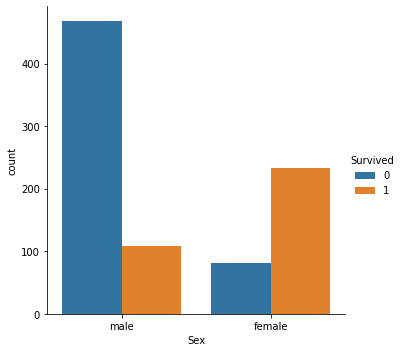

In [15]:
sns.catplot(x='Sex', hue='Survived', kind='count', data=TitanicTrainData)

The above graph indicates that the survival rate of the female passengers is significantly higher when compared to the male passengers. This indicates that the rescue team might have priortized saving the female passengers.

Below is the numerical representation of the same analysis.

In [16]:
TitanicTrainData.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

###Using a heatmap for the same analysis:

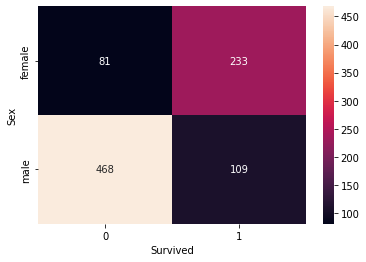

In [17]:
Group1 = TitanicTrainData.groupby(['Sex','Survived'])
GenderSurvived = Group1.size().unstack()
sns.heatmap(GenderSurvived, annot=True, fmt='d')

###Analyzing survival of passengers of different 'Pclass' using heatmap.

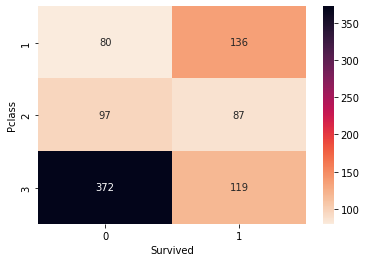

In [18]:
Group2 = TitanicTrainData.groupby(['Pclass', 'Survived'])
ClassSurvived = Group2.size().unstack()
cmap = sns.cm.rocket_r #inverted color map
sns.heatmap(ClassSurvived, annot=True, fmt='d', cmap=cmap)

The above results indicate that the rescue team might have priortized rescuing members of the upper class.


Next we analyze the survival rates of the passengers based on 'Sex' and 'Age' using a Violin Plot:

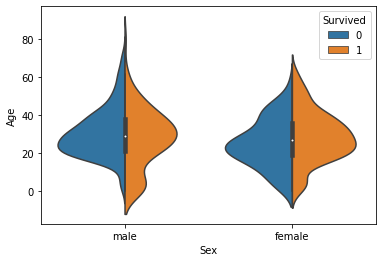

In [19]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=TitanicTrainData, split=True)

The above result indicates:
* Most passengers of the Titanic belonged to the age group between 20 and 40, with the male passengers strongly indicating this observation while the female passengers do not show a similar disribution as their data points seem to be relatively a bit more evenly distributed.
* The rescue team managed to save many male passengers under 20 when compared to the female passengers of the same age group.
* The age group 0 to 20 is more populated when compared to the data points depicting passengers aged above 40. This (coupled with the previously mentioned observation) indicates that a younger group of people boarded the Titanic.


### Analyzing survival rates based on 'Pclass' and 'Age' using Violin Plot:

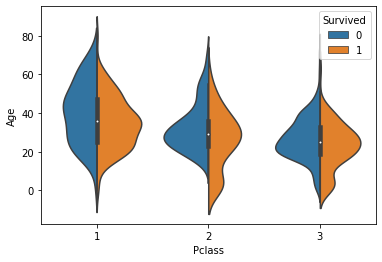

In [20]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=TitanicTrainData, split=True)

The above result indicates:
* most First Class passengers were older than 40, this also indicates that most wealthy people of the time must have been much elder than the youth of the time.
* the First Class passengers seem to represent a wider age group of people when comapred to passengers of other 2 class which show very dense population of data points in the age group 20-40.

# Data conversion

Let's first look at the Cabin column. This contains important information in the form of the *Deck* the passenger was on. We need to extract this information to make it usable.

We do this using regular expressions

In [21]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [TitanicTrainData, TitanicTestData]

for datum in data:
    datum['Cabin'] = datum['Cabin'].fillna("U0")
    datum['Deck'] = datum['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    datum['Deck'] = datum['Deck'].map(deck).fillna(0).astype(int)

TitanicTrainData = TitanicTrainData.drop(['Cabin'], axis=1)
TitanicTestData = TitanicTestData.drop(['Cabin'], axis=1)

Extracting Richer information about the passengers based on their titles.

In [22]:
data = [TitanicTrainData, TitanicTestData]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for datum in data:
    datum['Title'] = datum.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    datum['Title'] = datum['Title'].replace(['Lady', 'Sir','Major','Capt','Don',\
                                             'Dr', 'Col', 'Rev', 'Jonkheer','Countess', 'Dona'],\
                                             'Rare').replace(['Ms','Mlle'], 'Miss').replace('Mme', 'Mrs')
    datum['Title'] = datum['Title'].map(titles).fillna(0)

TitanicTrainData = TitanicTrainData.drop(['Name'], axis=1)
TitanicTestData = TitanicTestData.drop(['Name'], axis=1)

Next we encode gender information

In [23]:
genders = {"male": 0, "female": 1}
data = [TitanicTrainData, TitanicTestData]

for datum in data:
    datum['Sex'] = datum['Sex'].map(genders)

We can build another feature based on where the passenger embarked his/her journey from, to see if that has any correlation to survival rate.

In [24]:
p = {"S": 0, "C": 1, "Q": 2}
data = [TitanicTrainData, TitanicTestData]

for datum in data:
    datum['Embarked'] = datum['Embarked'].map(p)

## Creating categories

#### Of Age

In [25]:
pd.qcut(TitanicTrainData['Age'], 6).value_counts()

(-0.001, 18.0]    166
(28.0, 34.0]      150
(41.0, 80.0]      148
(23.0, 28.0]      146
(18.0, 23.0]      145
(34.0, 41.0]      136
Name: Age, dtype: int64

In [26]:
data = [TitanicTrainData, TitanicTestData]
for datum in data:
    datum['Age'] = datum['Age'].astype(int)
    datum.loc[ datum['Age'] <= 11, 'Age'] = 0
    datum.loc[(datum['Age'] > 11) & (datum['Age'] <= 18), 'Age'] = 1
    datum.loc[(datum['Age'] > 18) & (datum['Age'] <= 22), 'Age'] = 2
    datum.loc[(datum['Age'] > 22) & (datum['Age'] <= 27), 'Age'] = 3
    datum.loc[(datum['Age'] > 27) & (datum['Age'] <= 33), 'Age'] = 4
    datum.loc[(datum['Age'] > 33) & (datum['Age'] <= 40), 'Age'] = 5
    datum.loc[(datum['Age'] > 40) & (datum['Age'] <= 66), 'Age'] = 6
    datum.loc[ datum['Age'] > 66, 'Age'] = 6

Now let's see the number of passengers in each category

In [27]:
TitanicTrainData['Age'].value_counts()

4    162
6    161
5    143
3    140
2    119
1     98
0     68
Name: Age, dtype: int64

#### Of Fare

Find out quartiles, so that the frequency of each category of ticket hodlers is equally distributed

In [28]:
pd.qcut(TitanicTrainData['Fare'], 4).value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: Fare, dtype: int64

In [29]:
data = [TitanicTrainData, TitanicTestData]

for datum in data:
    datum['Fare'] = datum['Fare'].fillna(0)
    datum['Fare'] = datum['Fare'].astype(int)

In [30]:
data = [TitanicTrainData, TitanicTestData]

for datum in data:
    datum.loc[ datum['Fare'] <= 7.91, 'Fare'] = 0
    datum.loc[(datum['Fare'] > 7.91) & (datum['Fare'] <= 14.454), 'Fare'] = 1
    datum.loc[(datum['Fare'] > 14.454) & (datum['Fare'] <= 31), 'Fare']   = 2
    datum.loc[(datum['Fare'] > 31) & (datum['Fare'] <= 99), 'Fare']   = 3
    datum.loc[(datum['Fare'] > 99) & (datum['Fare'] <= 250), 'Fare']   = 4
    datum.loc[ datum['Fare'] > 250, 'Fare'] = 5
    datum['Fare'] = datum['Fare'].astype(int)

## Coming up with new features for better accuracy

### Age times class

In [31]:
data = [TitanicTrainData, TitanicTestData]
for datum in data:
    datum['Age_Class']= datum['Age']* datum['Pclass']

### Fare Per person

#### First we need to check if the passengers were solo or with someone

This information come from the combination of Parch and SibSp.

We do this as one person may pay for multiple members of his/her family, and some may not pay anything.

However, the ticket price of each individual can reveal important information, hence using these data points, we create a new feature, *NotAlone* which checks if the person was travelling with someone or not. 

Later while training the models, we will use this feature to create another feature of Fare per person.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


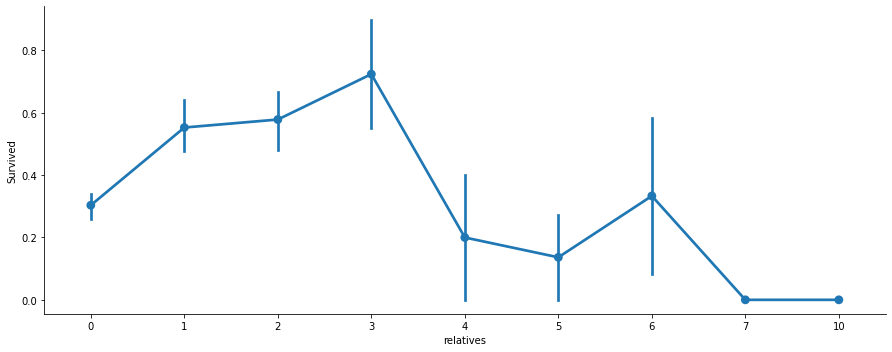

In [32]:
data = [TitanicTrainData, TitanicTestData]
for datum in data:
    datum['relatives'] = datum['SibSp'] + datum['Parch']
    datum.loc[datum['relatives'] > 0, 'NotAlone'] = 0
    datum.loc[datum['relatives'] == 0, 'NotAlone'] = 1
    datum['NotAlone'] = datum['NotAlone'].astype(int)
TitanicTrainData['NotAlone'].value_counts()

axes = sns.factorplot('relatives','Survived', 
                      data=TitanicTrainData, aspect = 2.5, )

#### Fare Per person

In [33]:
for datum in data:
    datum['FarePerPerson'] = datum['Fare']/(datum['relatives']+1)
    datum['FarePerPerson'] = datum['FarePerPerson'].astype(int)

# To the machine learning Models

In [34]:
X_train = TitanicTrainData.drop("Survived", axis=1)
Y_train = TitanicTrainData["Survived"]
X_test  = TitanicTestData.drop("PassengerId", axis=1).copy()
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Age_Class,relatives,NotAlone,FarePerPerson
0,3,0,2,1,0,0,0,8,1,6,1,0,0
1,1,1,5,1,0,3,1,3,3,5,1,0,1
2,3,1,3,0,0,0,0,8,2,9,0,1,0
3,1,1,5,1,0,3,0,3,3,5,1,0,1
4,3,0,5,0,0,1,0,8,1,15,0,1,1


SGD

In [35]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(max_iter=5, tol=None)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

classifier.score(X_train, Y_train)

SgdFinal = round(classifier.score(X_train, Y_train) * 100, 2)
print(SgdFinal)

80.36


Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

rf.score(X_train, Y_train)
RfcFinal = round(rf.score(X_train, Y_train) * 100, 2)
print(RfcFinal)

92.59


Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

LrFinal = round(lr.score(X_train, Y_train) * 100, 2)
print(LrFinal)

81.26


KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
KnnFinal = round(knn.score(X_train, Y_train) * 100, 2)
print(KnnFinal)

84.85


Gaussian Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
GausFinal = round(gaussian.score(X_train, Y_train) * 100, 2)
print(GausFinal)

77.44


LSVM

In [40]:
from sklearn.svm import SVC, LinearSVC
svc = LinearSVC()
svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

LinSvcFinal = round(svc.score(X_train, Y_train) * 100, 2)
print(LinSvcFinal)

81.37


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Decison Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
DtFinal = round(dt.score(X_train, Y_train) * 100, 2)
print(DtFinal)

92.59


# Results and Discussions

In [42]:
score = [LinSvcFinal, KnnFinal, LrFinal, RfcFinal, GausFinal, SgdFinal, DtFinal]
models = ['SVM', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'SGD', 'Decision Tree']
print(pd.DataFrame(models, score).head(9))

                         0
81.37                  SVM
84.85                  KNN
81.26  Logistic Regression
92.59        Random Forest
77.44          Naive Bayes
80.36                  SGD
92.59        Decision Tree


From these observations, we see that our model form Random Forests and Decision Trees provide us with the best prediction Accuracy (92.70%)